In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plots
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv(
    "/kaggle/input/datathon/weekly_supply_estimates.csv",
    parse_dates=["Date"],
    date_format="%b %d, %Y"
)

df2 = pd.read_csv(
    "/kaggle/input/datathon/monthly_gasoline_makeup_percentages.csv",
)

df2['Date'] = pd.to_datetime(df2['Date']) 
df2.set_index('Date', inplace=True)  

# Display first 5 rows
df.head()

In [2]:
df = pd.read_csv(
    "./data/weekly_supply_estimates.csv",
    parse_dates=["Date"],
    date_format="%b %d, %Y"
)

df2 = pd.read_csv(
    "./data/monthly_gasoline_makeup_percentages.csv",
)

df2['Date'] = pd.to_datetime(df2['Date']) 
df2.set_index('Date', inplace=True)  

# Display first 5 rows
df.head()

,Date,Weekly U.S. Field Production of Crude Oil (Thousand Barrels per Day),Weekly U.S. Refiner Net Input of Crude Oil (Thousand Barrels per Day),Weekly U.S. Gross Inputs into Refineries (Thousand Barrels per Day),Weekly U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day),Weekly U.S. Percent Utilization of Refinery Operable Capacity (Percent),Weekly U.S. Refiner and Blender Net Input of Gasoline Blending Components (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Adjusted Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Reformulated Motor Gasoline (Thousand Barrels per Day),...,Weekly U.S. Ending Stocks of Conventional Motor Gasoline (Thousand Barrels),Weekly U.S. Ending Stocks of Gasoline Blending Components (Thousand Barrels),Weekly U.S. Imports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Imports of Total Gasoline (Thousand Barrels per Day),Weekly U.S. Imports of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Imports of Reformulated Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Imports of Conventional Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Imports of Gasoline Blending Components (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Motor Gasoline (Thousand Barrels per Day)
0,2000-01-07,6000,13905,14040,16317,86.1,0,8173,8173,2607,...,113483,39697,8508,470,294,54,240,176,108,0
1,2000-01-14,6019,13746,13915,16317,85.3,0,8039,8039,2485,...,116945,39063,7396,480,293,199,94,187,108,0
2,2000-01-21,6013,13850,13978,16317,85.7,0,7626,7626,2442,...,116189,42455,8448,555,293,172,121,262,108,0
3,2000-01-28,5988,14087,14266,16317,87.4,0,7836,7836,2496,...,115573,43438,6746,884,616,352,264,268,108,0
4,2000-02-04,6011,13707,13811,16317,84.6,0,7812,7812,2268,...,117974,41278,8416,430,183,52,131,247,108,0


In [3]:
# Basic info
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

df.describe(include='all')

# Check for missing values
missing = df.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0])

Dataset Shape: (1252, 25)

Data Types:
Date                                                                                                              datetime64[ns]
Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)                                                      int64
Weekly U.S. Refiner Net Input of Crude Oil  (Thousand Barrels per Day)                                                     int64
Weekly U.S. Gross Inputs into Refineries  (Thousand Barrels per Day)                                                       int64
Weekly U. S. Operable Crude Oil Distillation Capacity   (Thousand Barrels per Calendar Day)                                int64
Weekly U.S. Percent Utilization of Refinery Operable Capacity (Percent)                                                  float64
Weekly U.S. Refiner and Blender Net Input of Gasoline Blending Components  (Thousand Barrels per Day)                      int64
Weekly U.S. Refiner and Blender Adjusted Net Production of

In [4]:
# Convert date columns
date_cols = ['Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Separate numeric and non-numeric data
numeric_cols = df.select_dtypes(include=np.number).columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

# Handle missing values (?)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

for col in non_numeric_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

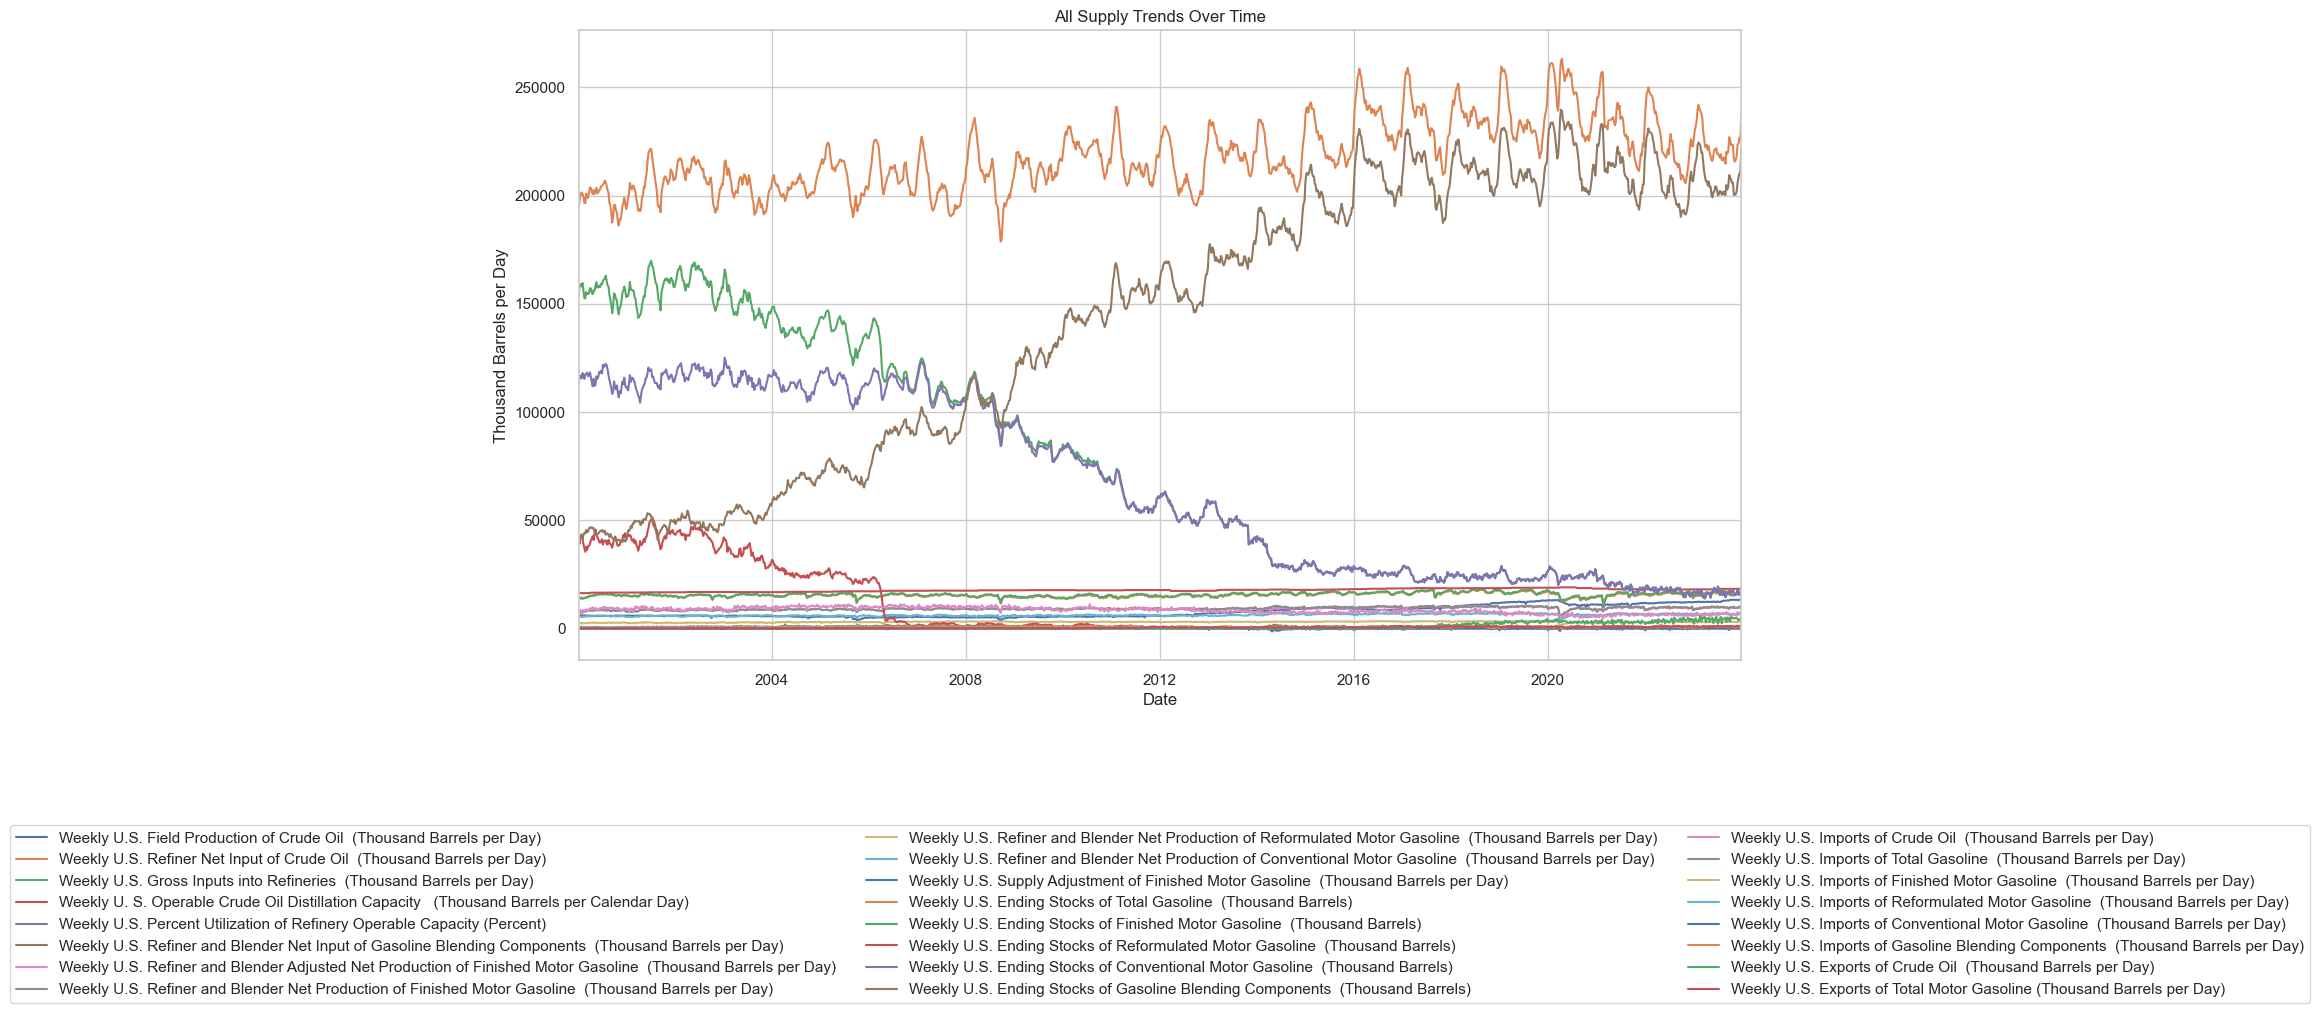

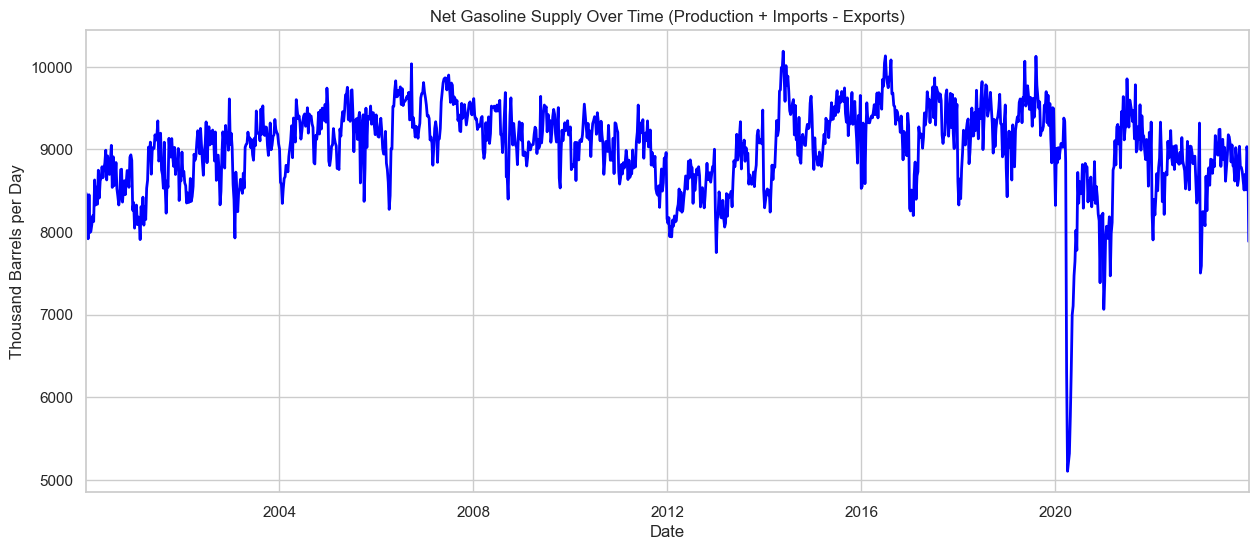

In [5]:
# Visualisation of trend
plt.figure(figsize=(15, 10))

numerical_cols = df.select_dtypes(include=[np.number]).columns
for column in numerical_cols:
    plt.plot(df["Date"], df[column], label=column)

plt.title('All Supply Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Thousand Barrels per Day')
plt.xlim(df["Date"].min(), df["Date"].max())  # Match dataset's date range

# Adjust legend and spacing
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=3,
    frameon=True
)
plt.subplots_adjust(bottom=0.25)
plt.show()

# Net supply of Gasoline
df["Net_Gasoline_Supply"] = df.iloc[:, 8] + df.iloc[:, 19] - df.iloc[:, 24]
# Plot net supply over time
plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["Net_Gasoline_Supply"], color="blue", linewidth=2)

# Formatting
plt.title("Net Gasoline Supply Over Time (Production + Imports - Exports)")
plt.xlabel("Date")
plt.ylabel("Thousand Barrels per Day")
plt.grid(True)

# Set x-axis limits to match dataset range (2000–2023)
plt.xlim(df["Date"].min(), df["Date"].max())

plt.show()


In [6]:
# Outlier detection (?)
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Time series analysis (?)
if 'date_column' in df.columns:
    plt.figure(figsize=(12,6))
    df.set_index('date_column')['value_column'].plot()
    plt.title('Time Series Analysis')
    plt.show()

NameError: name 'num_cols' is not defined

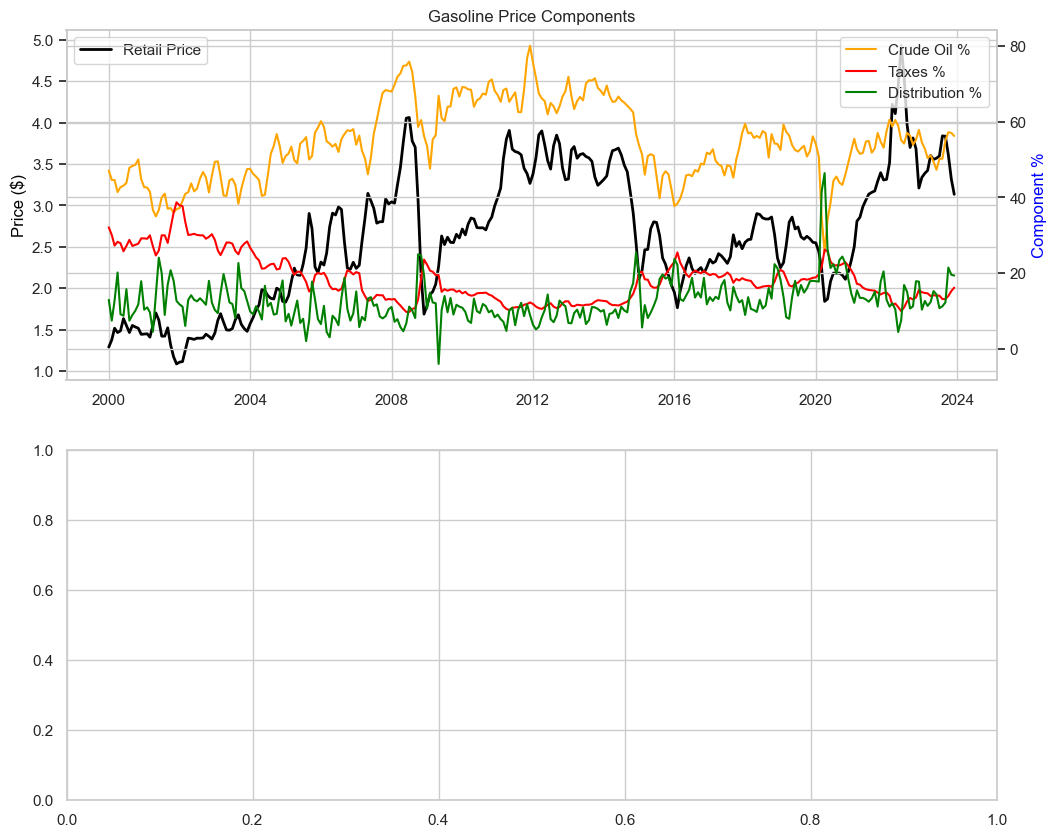

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

ax1 = axes[0]
ax2 = ax1.twinx()
regular = df2[df2['Type'] == 'Regular']

ax1.plot(regular.index, regular['Retail_Price'], 'black', lw=2, label='Retail Price')  # Index is now datetime
ax2.plot(regular.index, regular['Crude_Oil'], 'orange', label='Crude Oil %')
ax2.plot(regular.index, regular['Taxes'], 'red', label='Taxes %')
ax2.plot(regular.index, regular['Distribution_and_Marketing'], 'green', label='Distribution %')

ax1.set_title('Gasoline Price Components')
ax1.set_ylabel('Price ($)', color='black')
ax2.set_ylabel('Component %', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

/var/folders/3m/wqvcp0vs4n3fc_ywqy10vbhw0000gn/T/ipykernel_78904/3575762374.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_df['Crude_Corr'] = regular_df['Retail_Price'].rolling(window_size).corr(regular_df['Crude_Oil'])
/var/folders/3m/wqvcp0vs4n3fc_ywqy10vbhw0000gn/T/ipykernel_78904/3575762374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_df['Taxes_Corr'] = regular_df['Retail_Price'].rolling(window_size).corr(regular_df['Taxes'])
/var/folders/3m/wqvcp0vs4n3fc_ywqy10vbhw0000gn/T/i

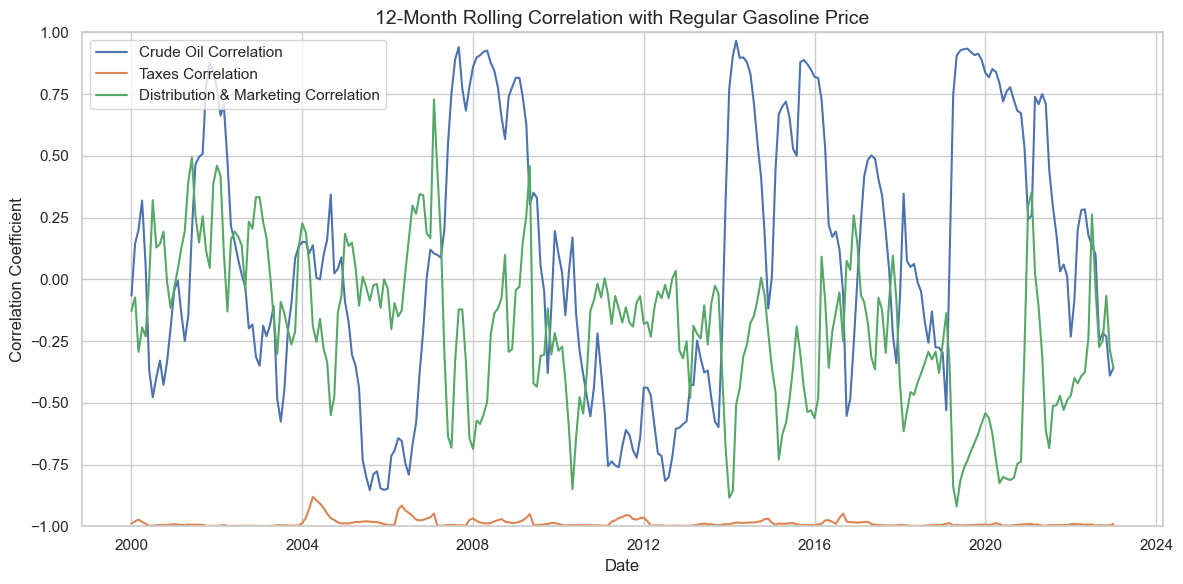

In [8]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Regular only
regular_df = df2[df2['Type'] == 'Regular']

window_size = 12  
regular_df['Crude_Corr'] = regular_df['Retail_Price'].rolling(window_size).corr(regular_df['Crude_Oil'])
regular_df['Taxes_Corr'] = regular_df['Retail_Price'].rolling(window_size).corr(regular_df['Taxes'])
regular_df['Dist_Corr'] = regular_df['Retail_Price'].rolling(window_size).corr(regular_df['Distribution_and_Marketing'])

plt.plot(regular_df.index, regular_df['Crude_Corr'], label='Crude Oil Correlation')
plt.plot(regular_df.index, regular_df['Taxes_Corr'], label='Taxes Correlation')
plt.plot(regular_df.index, regular_df['Dist_Corr'], label='Distribution & Marketing Correlation')

plt.title('12-Month Rolling Correlation with Regular Gasoline Price', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.ylim(-1, 1) 
plt.tight_layout()
plt.show()